<a href="https://colab.research.google.com/github/BrokenShell/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












no tables - too hard, ok for stretch
do basics for practice


# 1) Replicate the lesson code.

In [2]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

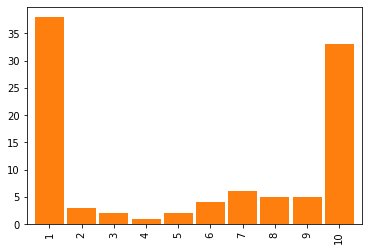

In [1]:
# Your Work Here
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

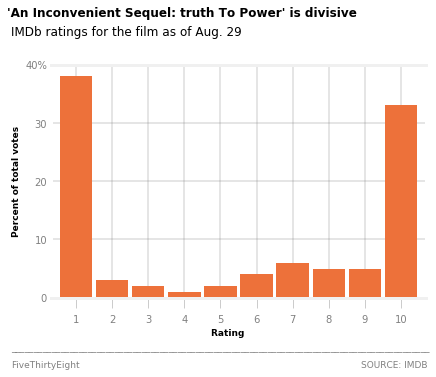

In [183]:
# Set stylesheet
plt.style.use('fivethirtyeight')

# figure axes syntax
fig, ax = plt.subplots()

# Make the figure background color white
fig.patch.set(facecolor='white')

# put bars on the axes
fake.plot.bar(width=0.9, color='#ED713A')

# Set axes background color
ax.set(facecolor='white')

# Set plot title
ax.set_title("'An Inconvenient Sequel: truth To Power' is divisive", fontsize=12, fontweight='bold', x=.35, y=1.18, usetex=False, fontname='Arial')

# Set plot ylabel
ax.set_ylabel('Percent of total votes', fontsize=9, fontweight='bold')

# Set plot xlabel
ax.set_xlabel('Rating       ', fontsize=9, fontweight='bold')

# Set subtitle
ax.text(s='IMDb ratings for the film as of Aug. 29', y=45, x=-1.8, fontsize=12, usetex=False, fontname='Arial')

# set y axis labels, tick marks and grid lines
ax.set_yticklabels(['0', '10', '20', '30', '40%'], fontsize=10, color='grey')
ax.set_yticks(range(0,50,10))

# Set x axis labels, tick marks and grid lines
ax.set_xticklabels(range(1,11,1), rotation='horizontal', fontsize=10, color='grey')

# Set tick mark params
ax.tick_params(axis='x', length=10, color='#CCCCCC', pad=7, width=1)

# spine options
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')

# Grind style
ax.grid(color='gray', linewidth=0.4)

# footer
ax.text(s='FiveThirtyEight', y=-12, x=-1.8, fontsize=9, usetex=False, fontname='Arial', color='gray')
ax.text(s='SOURCE: IMDB', y=-12, x=7.9, fontsize=9, usetex=False, fontname='Arial', color='gray')
ax.text(s=('_' * 93), y=-9, x=-1.8, fontsize=9, usetex=False, fontname='Arial', color='gray')

# Show the plot and squelch the funny output
fig.show()

# 2) Reproduce another example from FiveThityEight's shared data repository.

In [186]:
import pandas as pd
direct_link = 'http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv'
women_majors = pd.read_csv(direct_link)
print(women_majors.info())
women_majors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
Year                             42 non-null int64
Agriculture                      42 non-null float64
Architecture                     42 non-null float64
Art and Performance              42 non-null float64
Biology                          42 non-null float64
Business                         42 non-null float64
Communications and Journalism    42 non-null float64
Computer Science                 42 non-null float64
Education                        42 non-null float64
Engineering                      42 non-null float64
English                          42 non-null float64
Foreign Languages                42 non-null float64
Health Professions               42 non-null float64
Math and Statistics              42 non-null float64
Physical Sciences                42 non-null float64
Psychology                       42 non-null float64
Public Administration            42 non-null float6

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


Text(1976, 25, 'Physical Sciences')

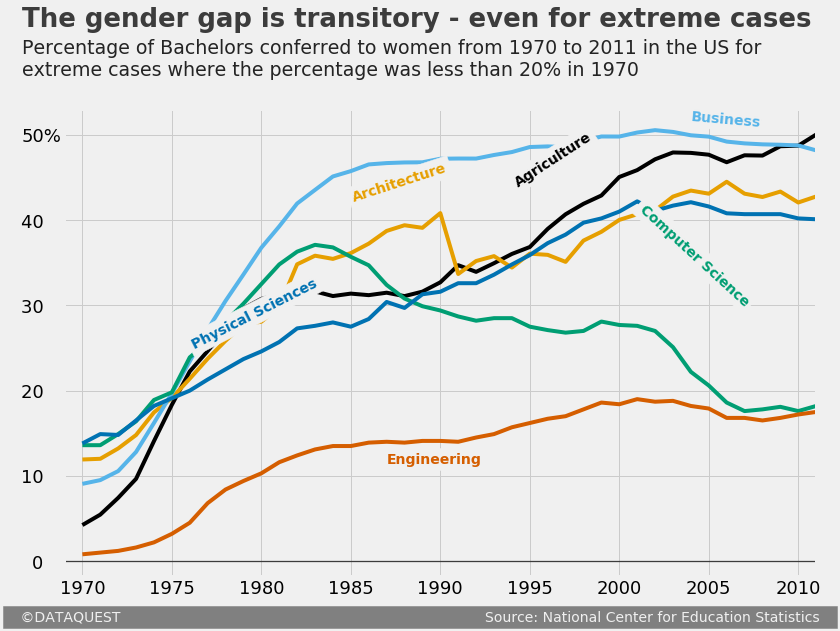

In [193]:
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]

fte_graph = women_majors.plot(x = 'Year', y = under_20.index, figsize = (12,8), color = colors, legend = False)

fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
fte_graph.set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40   ', '50%'])
fte_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
fte_graph.xaxis.label.set_visible(False)
fte_graph.set_xlim(left = 1969, right = 2011)
fte_graph.text(x = 1965.8, y = -7,
    s = '   ©DATAQUEST                                                                                 Source: National Center for Education Statistics   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
fte_graph.text(x = 1966.65, y = 62.7, s = "The gender gap is transitory - even for extreme cases",
               fontsize = 26, weight = 'bold', alpha = .75)
fte_graph.text(x = 1966.65, y = 57,
               s = 'Percentage of Bachelors conferred to women from 1970 to 2011 in the US for\nextreme cases where the percentage was less than 20% in 1970',
              fontsize = 19, alpha = .85)

fte_graph.text(x = 1994, y = 44, s = 'Agriculture', color = colors[0], weight = 'bold', rotation = 33,
              backgroundcolor = '#f0f0f0')
fte_graph.text(x = 1985, y = 42.2, s = 'Architecture', color = colors[1], weight = 'bold', rotation = 18,
              backgroundcolor = '#f0f0f0')
fte_graph.text(x = 2004, y = 51, s = 'Business', color = colors[2], weight = 'bold', rotation = -5,
               backgroundcolor = '#f0f0f0')
fte_graph.text(x = 2001, y = 30, s = 'Computer Science', color = colors[3], weight = 'bold', rotation = -42.5,
              backgroundcolor = '#f0f0f0')
fte_graph.text(x = 1987, y = 11.5, s = 'Engineering', color = colors[4], weight = 'bold',
              backgroundcolor = '#f0f0f0')
fte_graph.text(x = 1976, y = 25, s = 'Physical Sciences', color = colors[5], weight = 'bold', rotation = 27,
              backgroundcolor = '#f0f0f0')


# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here